In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
DATA = pd.read_csv('data.csv')

In [ ]:
DATA.index = pd.to_datetime(DATA['Time'], format='%Y-%m-%d %H:%M:%S')
train_set, test_set = DATA.loc[:'2018-12-31'], DATA.loc['2019-01-01':]
ntrain = len(train_set)
ntest = len(test_set)

In [ ]:
# DO NOT RUN
#lstm_forecast = np.zeros((ntest, 3))
#lstm_forecast24 = np.zeros((ntest-23,3))

In [ ]:

lstm_forecast24 = np.genfromtxt('lstm_forecast24.csv', delimiter=',')

# LSTM

## Univariate LSTM

### h=1

In [ ]:
scaler = MinMaxScaler()
# univariate
scaled = scaler.fit_transform(DATA[['Demand']])

# create a proper input (X) tensor & output (y) vector

X = []
y = []

horizon = 1     # forecast horizon
nlags = 24      # number of lags used for forecasting

for i in range(nlags, len(scaled)-horizon+1):
    X.append(scaled[i-nlags:i, :])
    y.append(scaled[i+horizon-1, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)
xdim = X.shape[2]
X_train, y_train = X[:(ntrain-nlags)], y[:(ntrain-nlags)]
X_test, y_test = X[(ntrain-nlags):], y[(ntrain-nlags):]

(35040, 24, 1) (35040,)


In [ ]:
# LSTM neural network
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(nlags, xdim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')
fit = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

loss = np.asarray(fit.history['loss'])
plt.plot(fit.history['loss'], label='Training loss')
plt.plot(fit.history['val_loss'], label='Validation loss')
plt.legend()
predicted = model.predict(X_test)
to_inverse = np.repeat(predicted, xdim, axis=-1)
uni1 = scaler.inverse_transform(to_inverse)[:,0]

Epoch 1/25
740/740 [==============================] - 43s 54ms/step - loss: 0.0173 - val_loss: 0.0037
Epoch 2/25
740/740 [==============================] - 50s 67ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 3/25
740/740 [==============================] - 42s 57ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 4/25
740/740 [==============================] - 38s 52ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 5/25
740/740 [==============================] - 46s 62ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 6/25
740/740 [==============================] - 38s 51ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 7/25
740/740 [==============================] - 35s 47ms/step - loss: 0.0017 - val_loss: 6.8376e-04
Epoch 8/25
740/740 [==============================] - 43s 58ms/step - loss: 0.0015 - val_loss: 8.7974e-04
Epoch 9/25
740/740 [==============================] - 52s 71ms/step - loss: 0.0014 - val_loss: 5.7893e-04
Epoch 10/25
740/740 [==============================] - 37s 50ms/step -

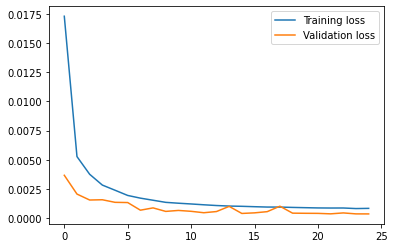

In [ ]:
# larger
# LSTM neural network
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(nlags, xdim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')

fit = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

loss = np.asarray(fit.history['loss'])
plt.plot(fit.history['loss'], label='Training loss')
plt.plot(fit.history['val_loss'], label='Validation loss')
plt.legend()

predicted = model.predict(X_test)
to_inverse = np.repeat(predicted, xdim, axis=-1)
uni2 = scaler.inverse_transform(to_inverse)[:,0]

In [ ]:
lstm_forecast[:,0] = uni2
np.savetxt('lstm_forecast.csv', lstm_forecast, delimiter=",")

### h=24

In [ ]:
scaler = MinMaxScaler()
# univariate
scaled = scaler.fit_transform(DATA[['Demand']])

# create a proper input (X) tensor & output (y) vector

X = []
y = []

horizon = 24     # forecast horizon , caution: only 24th value is forecasted
nlags = 24      # number of lags used for forecasting

for i in range(nlags, len(scaled)-horizon+1):
    X.append(scaled[i-nlags:i, :])
    y.append(scaled[i+horizon-1, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)
xdim = X.shape[2]
X_train, y_train = X[:(ntrain-nlags)], y[:(ntrain-nlags)]
X_test, y_test = X[(ntrain-nlags):], y[(ntrain-nlags):]

(35017, 24, 1) (35017,)


Epoch 1/50
740/740 [==============================] - 55s 69ms/step - loss: 0.0247 - val_loss: 0.0179
Epoch 2/50
740/740 [==============================] - 50s 67ms/step - loss: 0.0160 - val_loss: 0.0148
Epoch 3/50
740/740 [==============================] - 49s 67ms/step - loss: 0.0145 - val_loss: 0.0148
Epoch 4/50
740/740 [==============================] - 49s 67ms/step - loss: 0.0134 - val_loss: 0.0169
Epoch 5/50
740/740 [==============================] - 49s 67ms/step - loss: 0.0124 - val_loss: 0.0123
Epoch 6/50
740/740 [==============================] - 49s 67ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 7/50
740/740 [==============================] - 49s 67ms/step - loss: 0.0093 - val_loss: 0.0102
Epoch 8/50
740/740 [==============================] - 49s 66ms/step - loss: 0.0088 - val_loss: 0.0095
Epoch 9/50
740/740 [==============================] - 50s 67ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 10/50
740/740 [==============================] - 50s 67ms/step - loss: 0.007

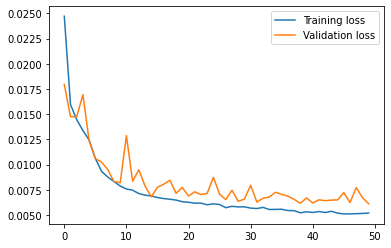

In [ ]:
# LSTM neural network
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(nlags, xdim), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')

fit = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

loss = np.asarray(fit.history['loss'])
plt.plot(fit.history['loss'], label='Training loss')
plt.plot(fit.history['val_loss'], label='Validation loss')
plt.legend()

predicted = model.predict(X_test)
to_inverse = np.repeat(predicted, xdim, axis=-1)
uni2_24 = scaler.inverse_transform(to_inverse)[:,0]

lstm_forecast24[:,0] = uni2_24
np.savetxt('lstm_forecast24.csv', lstm_forecast24, delimiter=",")

In [ ]:
lstm_forecast24[:,0] = uni2_24
np.savetxt('lstm_forecast24.csv', lstm_forecast24, delimiter=",")

## Multivariate

In [ ]:
seconds = DATA.index.map(pd.Timestamp.timestamp)

In [ ]:
day = 24*60*60
week = 7*day
year = (365.2425)*day

DATA['Day sin'] = np.sin(seconds * (2 * np.pi / day))
DATA['Day cos'] = np.cos(seconds * (2 * np.pi / day))
DATA['Week sin'] = np.sin(seconds * (2 * np.pi / week))
DATA['Week cos'] = np.cos(seconds * (2 * np.pi / week))
DATA['Year sin'] = np.sin(seconds * (2 * np.pi / year))
DATA['Year cos'] = np.cos(seconds * (2 * np.pi / year))

### h=1

Demand ~ Harmonics + Holidays (LSTM_S)

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(DATA[['Demand','NonWeekend_holiday',
                                    'Day sin','Day cos','Week sin','Week cos',
                                    'Year sin','Year cos']])

# shift regressors' series so the value at moment t is used for prediction at t
reg = scaled[1:,1:]
scaled[:(len(scaled)-1),1:] = reg


# create a proper input (X) tensor & output (y) vector

X = []
y = []

horizon = 1     # forecast horizon
nlags = 24      # number of lags used for forecasting

for i in range(nlags, len(scaled)-horizon+1):
    X.append(scaled[i-nlags:i, :])
    y.append(scaled[i+horizon-1:i+horizon, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)
xdim = X.shape[2]
X_train, y_train = X[:(ntrain-nlags)], y[:(ntrain-nlags)]
X_test, y_test = X[(ntrain-nlags):], y[(ntrain-nlags):]

(35040, 24, 8) (35040, 1)


Epoch 1/25
740/740 [==============================] - 375s 503ms/step - loss: 0.0106 - val_loss: 0.0035
Epoch 2/25
740/740 [==============================] - 345s 467ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 3/25
740/740 [==============================] - 322s 435ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 4/25
740/740 [==============================] - 294s 398ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 5/25
740/740 [==============================] - 370s 501ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 6/25
740/740 [==============================] - 363s 492ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/25
740/740 [==============================] - 443s 600ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/25
740/740 [==============================] - 369s 500ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/25
740/740 [==============================] - 381s 516ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/25
740/740 [==============================] - 429s 581m

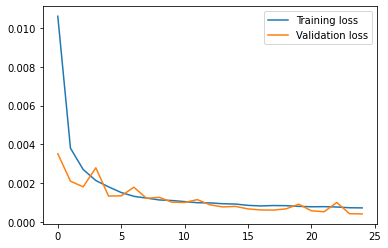

In [ ]:
# LSTM neural network
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(nlags, xdim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')

fit = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

loss = np.asarray(fit.history['loss'])
plt.plot(fit.history['loss'], label='Training loss')
plt.plot(fit.history['val_loss'], label='Validation loss')
plt.legend()

predicted = model.predict(X_test)
to_inverse = np.repeat(predicted, xdim, axis=-1)
lstms_1 = scaler.inverse_transform(to_inverse)[:,0]

lstm_forecast[:,1] = lstms_1
np.savetxt('lstm_forecast.csv', lstm_forecast, delimiter=",")

Demand ~ Temperature + Harmonics + Holidays (LSTM_SX)

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(DATA[['Demand','NonWeekend_holiday','Temperature',
                                    'Day sin','Day cos','Week sin','Week cos',
                                    'Year sin','Year cos']])

# shift regressors' series so the value at moment t is used for prediction at t
reg = scaled[1:,1:]
scaled[:(len(scaled)-1),1:] = reg


# create a proper input (X) tensor & output (y) vector

X = []
y = []

horizon = 1     # forecast horizon
nlags = 24      # number of lags used for forecasting

for i in range(nlags, len(scaled)-horizon+1):
    X.append(scaled[i-nlags:i, :])
    y.append(scaled[i+horizon-1:i+horizon, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)
xdim = X.shape[2]
X_train, y_train = X[:(ntrain-nlags)], y[:(ntrain-nlags)]
X_test, y_test = X[(ntrain-nlags):], y[(ntrain-nlags):]

(35040, 24, 9) (35040, 1)


Epoch 1/25
740/740 [==============================] - 55s 71ms/step - loss: 0.0118 - val_loss: 0.0048
Epoch 2/25
740/740 [==============================] - 53s 71ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 3/25
740/740 [==============================] - 50s 67ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 4/25
740/740 [==============================] - 50s 67ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 5/25
740/740 [==============================] - 46s 63ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/25
740/740 [==============================] - 51s 69ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/25
740/740 [==============================] - 51s 70ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/25
740/740 [==============================] - 58s 79ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 9/25
740/740 [==============================] - 51s 69ms/step - loss: 0.0011 - val_loss: 8.8951e-04
Epoch 10/25
740/740 [==============================] - 51s 69ms/step - loss: 0

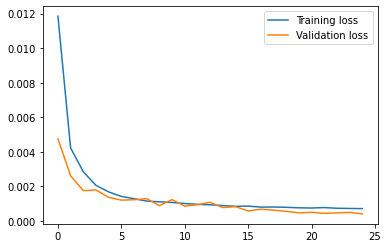

In [ ]:
# LSTM neural network
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(nlags, xdim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')

fit = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

loss = np.asarray(fit.history['loss'])
plt.plot(fit.history['loss'], label='Training loss')
plt.plot(fit.history['val_loss'], label='Validation loss')
plt.legend()

predicted = model.predict(X_test)
to_inverse = np.repeat(predicted, xdim, axis=-1)
lstmsx_1 = scaler.inverse_transform(to_inverse)[:,0]

lstm_forecast[:,2] = lstmsx_1
np.savetxt('lstm_forecast.csv', lstm_forecast, delimiter=",")

 ( old )  Demand ~ Temperature

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(DATA[['Demand','Temperature']])

# shift temperature series so the value at moment t is used for prediction at t
# therefore 23 past values of temperature and the current temperature is used
temper = scaled[1:,1]
scaled[:(len(scaled)-1),1] = temper

# create a proper input (X) tensor & output (y) vector

X = []
y = []

horizon = 1     # forecast horizon
nlags = 24      # number of lags used for forecasting

for i in range(nlags, len(scaled)-horizon+1):
    X.append(scaled[i-nlags:i, :])
    y.append(scaled[i+horizon-1:i+horizon, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)
xdim = X.shape[2]

X_train, y_train = X[:(ntrain-nlags)], y[:(ntrain-nlags)]
X_test, y_test = X[(ntrain-nlags):], y[(ntrain-nlags):]

# LSTM neural network
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(nlags, xdim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')
model.summary()

fit = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

predicted = model.predict(X_test)

### h=24

LSTM_S

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(DATA[['Demand','NonWeekend_holiday',
                                    'Day sin','Day cos','Week sin','Week cos',
                                    'Year sin','Year cos']])

# shift regressors' series so the value at moment t is used for prediction at t
reg = scaled[24:,1:]
scaled[:(len(scaled)-24),1:] = reg


# create a proper input (X) tensor & output (y) vector

X = []
y = []

horizon = 24     # forecast horizon
nlags = 24      # number of lags used for forecasting

for i in range(nlags, len(scaled)-horizon+1):
    X.append(scaled[i-nlags:i, :])
    y.append(scaled[i+horizon-1:i+horizon, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)
xdim = X.shape[2]
X_train, y_train = X[:(ntrain-nlags)], y[:(ntrain-nlags)]
X_test, y_test = X[(ntrain-nlags):], y[(ntrain-nlags):]

(35017, 24, 8) (35017, 1)


Epoch 1/25
740/740 [==============================] - 37s 47ms/step - loss: 0.0134 - val_loss: 0.0068
Epoch 2/25
740/740 [==============================] - 32s 44ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 3/25
740/740 [==============================] - 32s 44ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 4/25
740/740 [==============================] - 33s 45ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 5/25
740/740 [==============================] - 33s 44ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 6/25
740/740 [==============================] - 33s 45ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 7/25
740/740 [==============================] - 33s 45ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 8/25
740/740 [==============================] - 33s 44ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 9/25
740/740 [==============================] - 33s 45ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 10/25
740/740 [==============================] - 33s 44ms/step - loss: 0.001

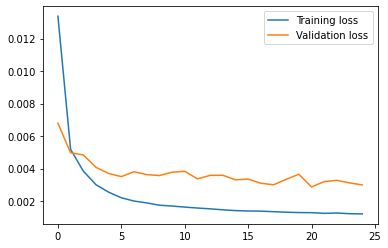

In [ ]:
# LSTM neural network
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(nlags, xdim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')

fit = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

loss = np.asarray(fit.history['loss'])
plt.plot(fit.history['loss'], label='Training loss')
plt.plot(fit.history['val_loss'], label='Validation loss')
plt.legend()

predicted = model.predict(X_test)
to_inverse = np.repeat(predicted, xdim, axis=-1)
lstms_24 = scaler.inverse_transform(to_inverse)[:,0]

lstm_forecast24[:,1] = lstms_24
np.savetxt('lstm_forecast24.csv', lstm_forecast24, delimiter=",")

LSTM_SX

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(DATA[['Demand','Temperature','NonWeekend_holiday',
                                    'Day sin','Day cos','Week sin','Week cos',
                                    'Year sin','Year cos']])

# shift regressors' series so the value at moment t is used for prediction at t
reg = scaled[24:,1:]
scaled[:(len(scaled)-24),1:] = reg


# create a proper input (X) tensor & output (y) vector

X = []
y = []

horizon = 24     # forecast horizon
nlags = 24      # number of lags used for forecasting

for i in range(nlags, len(scaled)-horizon+1):
    X.append(scaled[i-nlags:i, :])
    y.append(scaled[i+horizon-1:i+horizon, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)
xdim = X.shape[2]
X_train, y_train = X[:(ntrain-nlags)], y[:(ntrain-nlags)]
X_test, y_test = X[(ntrain-nlags):], y[(ntrain-nlags):]

(35017, 24, 9) (35017, 1)


Epoch 1/100
740/740 [==============================] - 36s 45ms/step - loss: 0.0108 - val_loss: 0.0047
Epoch 2/100
740/740 [==============================] - 33s 45ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 3/100
740/740 [==============================] - 34s 46ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 4/100
740/740 [==============================] - 33s 45ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 5/100
740/740 [==============================] - 33s 44ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 6/100
740/740 [==============================] - 35s 47ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 7/100
740/740 [==============================] - 33s 44ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 8/100
740/740 [==============================] - 33s 44ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 9/100
740/740 [==============================] - 33s 45ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 10/100
740/740 [==============================] - 33s 44ms/step - l

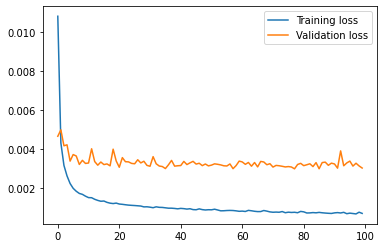

In [ ]:
# LSTM neural network
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(nlags, xdim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.compile(optimizer='adam', loss='mse')

fit = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

loss = np.asarray(fit.history['loss'])
plt.plot(fit.history['loss'], label='Training loss')
plt.plot(fit.history['val_loss'], label='Validation loss')
plt.legend()

predicted = model.predict(X_test)
to_inverse = np.repeat(predicted, xdim, axis=-1)
lstmsx_24 = scaler.inverse_transform(to_inverse)[:,0]

lstm_forecast24[:,2] = lstmsx_24
np.savetxt('lstm_forecast24.csv', lstm_forecast24, delimiter=",")

## Export

In [ ]:
lstm_forecast[:,0] = lstm_forecast_uni1

In [ ]:
# export
np.savetxt('lstm_forecast.csv', lstm_forecast, delimiter=",")

# Neural Prophet

In [ ]:
!pip install neuralprophet[live]
from neuralprophet import NeuralProphet

In [ ]:
df = train_set[['Time','Demand','Temperature']]
df.columns = ['ds','y','T']

In [ ]:
m = NeuralProphet(n_lags=24)
m = m.add_country_holidays('PL')
m = m.highlight_nth_step_ahead_of_each_forecast(24)
m = m.add_lagged_regressor('T')

metrics = m.fit(df, freq='H')



AssertionError: ignored

In [ ]:
%reset-f

In [ ]:
test_neural = DATA.loc['2018-12-31':]
df_test = test_neural[['Time','Demand','Temperature']]
df_test.columns = ['ds','y','T']

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
forecast1 = m.predict(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


In [ ]:
forecast1.iloc[25]

In [ ]:
forecast24 = m.predict(df_test)

AssertionError: ignored

In [ ]:
# export
to_export = forecast['yhat1']
to_export.to_csv('neural_forecast.csv',index=False)

In [ ]:
test_neural2 = DATA.loc['2018-12-31':'2019-01-08']
df_test2 = test_neural[['Time','Demand','Temperature']]
df_test2.columns = ['ds','y','T']
forecast2 = m.predict(df_test2)

In [ ]:
test_neural3 = DATA.loc['2018-12-31':]
df_test3 = test_neural[['Time','Demand','Temperature']]
df_test3.columns = ['ds','y','T']
forecast3 = m.predict(df_test3)

In [ ]:
m.test(df_test)